## Dataset Cleaning & Preprocessing

In [155]:
import warnings
warnings.filterwarnings('ignore')



In [87]:
import pandas as pd
from ast import literal_eval
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('midi_dataframe.csv', parse_dates=[11])

# Cleaning
df.drop_duplicates(subset='file_name', inplace=True)
df.dropna(subset=['tgdb_genres'], inplace=True)
categories_filter = df.console.isin(['Medleys', 'Piano Only'])
remix_filter = df.title.str.contains('[Rr]emix')

df = df[~categories_filter & ~remix_filter]
df_stripped = df.copy()
df_stripped.title = df.title.str.replace('\(\d+\)', '').str.rstrip()
df_stripped['rank'] = df.title.str.extract('\((\d+)\)', expand=False)
df = df_stripped.sort_values(by='rank', ascending=False).groupby(['brand', 'console', 'game', 'title']).first().reset_index()
df.set_index('file_name', inplace=True)

In [139]:
df

,brand,console,game,title,tgdb_genres,tgdb_id,tgdb_developer,tgdb_publisher,tgdb_platform,tgdb_gametitle,tgdb_releasedate,tgdb_players,tgdb_rating,tgdb_esrb,tgdb_overview,rank
file_name,,,,,,,,,,,,,,,,
1c1c3d41db134545fce89f5d70ed5019c5bef89e.mid,Atari,Atari 2600,Asteroids,Main Theme,['Shooter'],1342.0,Atari,Atari,Atari 2600,Asteroids,1979-08-01,2,7.8000,NaN,The objective of Asteroids is to score as many...,NaN
5cd47fd4a8e211f4f6af4018d324ea32e37262ba.mid,Atari,Atari 2600,Atari Video Cube,Cube Clear,['Puzzle'],17501.0,Atari,Atari,Atari 2600,Atari Video Cube,1982-01-01,NaN,NaN,NaN,Help Hubie the Cube Master solve the magical A...,NaN
44d67e41ef7884e54291ce8ae84ba830cf977375.mid,Atari,Atari 2600,Atari Video Cube,Game Start,['Puzzle'],17501.0,Atari,Atari,Atari 2600,Atari Video Cube,1982-01-01,NaN,NaN,NaN,Help Hubie the Cube Master solve the magical A...,NaN
5eb1d30f90b60345d6d23e36f2def54f208d2509.mid,Atari,Atari 2600,Atari Video Cube,One Side Clear,['Puzzle'],17501.0,Atari,Atari,Atari 2600,Atari Video Cube,1982-01-01,NaN,NaN,NaN,Help Hubie the Cube Master solve the magical A...,NaN
85d0f0eea4a8d5e0c8b5240fe07f357373fdf31b.mid,Atari,Atari 2600,BMX Air Master,Intro,['Sports'],17509.0,Sculptured Software,TNT,Atari 2600,BMX Air Master,1989-01-01,2,NaN,NaN,"This isn't kid stuff! It's the fastest, flying...",2
9baa42fad4ea0572eff1fa335bbe5c7593af081f.mid,Atari,Atari 2600,BMX Air Master,Title Screen,['Sports'],17509.0,Sculptured Software,TNT,Atari 2600,BMX Air Master,1989-01-01,2,NaN,NaN,"This isn't kid stuff! It's the fastest, flying...",2
f5a36e140f7a046c6181c02049c2195246a0e53d.mid,Atari,Atari 2600,Ballblazer,Ballblazer,"['Action', 'Sports']",36720.0,Lucasfilm Games,Activision,MSX,Ballblazer,1987-01-01,2,NaN,NaN,Ballblazer is a simple one-on-one sports-style...,NaN
95718f986caea139349df4ebb5618e737fb381a3.mid,Atari,Atari 2600,Bionic Breakthrough,Title Screen,['Strategy'],52219.0,Atari,Atari,Atari 2600,Bionic Breakthrough,1984-06-22,1,NaN,NaN,This prototype is unplayable without the Mindl...,NaN
0f656e0b7a44b079bdef657517b8c9d62f97bb6d.mid,Atari,Atari 2600,Blue Print,In-Game,['Action'],41510.0,Bill Hindorff,Bally Midway,Commodore 64,Blue Print,1983-01-01,2,NaN,NaN,Chivalry is not dead! Fair Daisy Damsel is bei...,NaN


In [3]:
num_games = len(df.groupby(['tgdb_platform', 'tgdb_gametitle']))
print('There is %d midi files, from %d games, with %d midis matched with tgdb'
      %(len(df),
        num_games,
        (df.tgdb_gametitle.notnull().sum())))
df_features = pd.read_csv('features.csv').set_index('file_name')
print("There is %d midi files with computed features"%(len(df_features)))

print("After removing not valid midi files, we have %d files"%(len(df.join(df_features, how='inner'))))

There is 22179 midi files, from 3243 games, with 22179 midis matched with tgdb
There is 31483 midi files with computed features
After removing not valid midi files, we have 22005 files


In [140]:
df_genres = df.tgdb_genres.map(literal_eval, 'ignore').apply(pd.Series).stack().reset_index(level=1, drop=True).reset_index().set_index('file_name')
df_genres.columns = ['genre']

,genre
file_name,
1c1c3d41db134545fce89f5d70ed5019c5bef89e.mid,Shooter
5cd47fd4a8e211f4f6af4018d324ea32e37262ba.mid,Puzzle
44d67e41ef7884e54291ce8ae84ba830cf977375.mid,Puzzle
5eb1d30f90b60345d6d23e36f2def54f208d2509.mid,Puzzle
85d0f0eea4a8d5e0c8b5240fe07f357373fdf31b.mid,Sports
9baa42fad4ea0572eff1fa335bbe5c7593af081f.mid,Sports
f5a36e140f7a046c6181c02049c2195246a0e53d.mid,Action
f5a36e140f7a046c6181c02049c2195246a0e53d.mid,Sports
95718f986caea139349df4ebb5618e737fb381a3.mid,Strategy


In [146]:
df_pred = df_genres.join(df_features, how='inner')
# For more easy displaying of the genre title on the graph
df_pred['genre'] = df_pred['genre'].apply(lambda x : x.replace("Simulator", "Sim.").replace("Simulation", "Sim.").\
             replace("Construction and Management", "C&M"))
df_pred.head()

,genre,Prevalence_of_Most_Common_Pitch,Prevalence_of_Most_Common_Pitch_Class,Relative_Prevalence_of_Top_Pitches,Relative_Prevalence_of_Top_Pitch_Classes,Interval_Between_Most_Prevalent_Pitches,Interval_Between_Most_Prevalent_Pitch_Classes,Number_of_Common_Pitches,Pitch_Variety,Pitch_Class_Variety,...,Parallel_Motion,Similar_Motion,Contrary_Motion,Oblique_Motion,Parallel_Fifths,Parallel_Octaves,Dynamic_Range,Variation_of_Dynamics,Variation_of_Dynamics_In_Each_Voice,Average_Note_to_Note_Change_in_Dynamics
file_name,,,,,,,,,,,,,,,,,,,,,
0004cc74bde3bc82f44afb5f566187c3dbcea9b2.mid,Platform,0.1593,0.2242,0.7222,0.7500,5.0,5.0,2.0,28.0,12.0,...,0.0000,0.0,0.0000,0.00000,0.0,0.0,63.0,17.65,6.3240,13.7800
0005d95e4aed74b84826f6090fcc8e52bceb5cb3.mid,Action,0.1316,0.2368,0.6000,0.7037,5.0,7.0,1.0,20.0,8.0,...,0.6522,0.0,0.2609,0.08696,0.0,0.0,47.0,19.18,0.8643,0.3128
0005d95e4aed74b84826f6090fcc8e52bceb5cb3.mid,Adventure,0.1316,0.2368,0.6000,0.7037,5.0,7.0,1.0,20.0,8.0,...,0.6522,0.0,0.2609,0.08696,0.0,0.0,47.0,19.18,0.8643,0.3128
0005d95e4aed74b84826f6090fcc8e52bceb5cb3.mid,Sports,0.1316,0.2368,0.6000,0.7037,5.0,7.0,1.0,20.0,8.0,...,0.6522,0.0,0.2609,0.08696,0.0,0.0,47.0,19.18,0.8643,0.3128
0005d95e4aed74b84826f6090fcc8e52bceb5cb3.mid,Strategy,0.1316,0.2368,0.6000,0.7037,5.0,7.0,1.0,20.0,8.0,...,0.6522,0.0,0.2609,0.08696,0.0,0.0,47.0,19.18,0.8643,0.3128


## Feature Exploration & Analysis

In [166]:
#For all analysis according to genre, we obviously need to group all the features per midi to a genre :
df_pred = df_pred[~(df_pred['genre'] == 'Vehicle Sim.')]
groupby_genre = df_pred.groupby(by='genre')
#We drop one category, the "Vehicle Simulation" genre, since only one Midi track has this genre.
groupby_stats = groupby_genre.describe()#[['Duration','Major_or_Minor']]#[['count', 'mean', 'std']]
games_genre = list(groupby_stats.index)
groupby_stats['Duration']

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,8441.0,106.390382,85.483802,0.8000,49.8700,92.15,144.0000,1365.0
Adventure,4793.0,108.267443,85.564151,1.1670,52.1500,90.26,144.0000,1126.0
C&M Sim.,70.0,102.709786,81.242347,4.2500,50.2275,81.11,127.7000,376.6
Fighting,1846.0,113.830364,77.009804,1.2960,58.1900,104.00,158.9000,586.4
Flight Sim.,84.0,115.422738,91.944208,4.1740,51.7050,89.72,166.3750,365.4
Horror,154.0,120.115429,82.636837,2.6000,64.7750,104.15,157.6000,458.3
Life Sim.,191.0,101.997660,116.483678,2.0080,41.3750,85.63,124.6000,1380.0
MMO,75.0,164.762667,80.992115,28.5700,110.5000,152.70,226.7500,395.8
Music,100.0,98.118100,65.782772,5.8120,82.7900,90.00,98.9625,561.3


### 1. Major Or Minor

In [90]:
## Let's test a very simple feature analysis of major and minor tonality among genres.
def countMinMaj(x):
    col_of_interest = x['Major_or_Minor']
    majCount = 0
    minCount = 0
    for v in col_of_interest:
        if int(v) == 0:
            #from the documentation of the features, 
            majCount += 1
        else:
            minCount += 1
    return majCount, minCount


print('\033[1m' + "Percentage of Major pieces over all Midis per genre" + '\033[0m')
groupby_genre.apply(countMinMaj).apply(lambda x: 100*(x[0]/(x[0]+x[1])))

Percentage of Major pieces over all Midis per genre


genre
Action           98.767918
Adventure        98.476946
C&M Sim.        100.000000
Fighting         97.508126
Flight Sim.     100.000000
Horror           98.701299
Life Sim.       100.000000
MMO              85.333333
Music            99.000000
Platform         98.517331
Puzzle           97.704254
Racing           99.630996
Role-Playing     98.136266
Sandbox          98.734177
Shooter          99.330357
Sports           98.037467
Stealth         100.000000
Strategy         97.351598
dtype: float64

Those results seems to indicate that for all genres, the vast majority of the pieces are in Major, which is a surprising results to find. However, the feature description in the jSymbolic documentation states the following : 

"_
Whether the piece is major or minor, as indicated by the first encountered major/minor metadata tag in the piece. Set to 0 if the metadata indicates that the piece is major, or set to 1 if the metadata indicates that it is minor. Defaults to 0 if the key signature is unknown._"

Thus, jSymbolic decides on the tonality of the piece according to only the metadata of the MIDI file. Considering the dataset is user-contributed, it is defintely likely that not all user provided a tonality for their song encoding, and since jSymbolic default the encoding of unknown key signature to Major, we obtain this apparently skewed distribution toward Major keys. This is definitely some kind of critic that could be emitted about jSymbolic's design choices, why not assign another integer in the case of unknown key? Although it would possible to count all pieces with unkown key, without using jSymbolic, it is computationally too expensive with the current tools.

In conclusion, this feature cannot be interpreted to explain some kind of pattern of key according to the genre (i.e., we cannot use this feature for our research question)

### 2. Duration

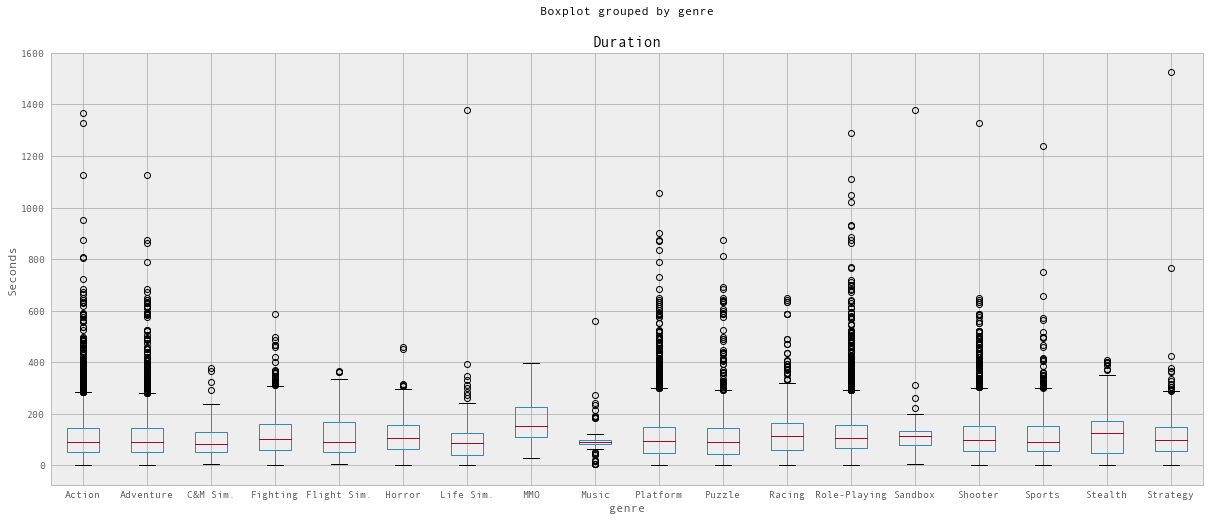

In [167]:
fig, ax = plt.subplots(figsize=(20,8))
plt.suptitle('')
df_pred.boxplot(column='Duration', by='genre', ax=ax)
ax.set_ylabel('Seconds')
plt.show()

Except for two specific game genres, the boxplots above show that the majority of the MIDIs have an IQR concentrated between 50 to 150 seconds, regardless of game genre. This seems to indicate no correlation can be drawn between duration of music pieces and game genre. 

The first noteworthy exception, is MMO's game music. Its IQR range from 115 to 225 seconds, considerably higher than other genres, and its the only genre to not have outliers. This difference can easily be explained from a game design point of view : MMO are designed to be played longer than other games, due to their monthly subscription system, in opposition of the "buy once" system of most other games. Thus, the player needs to be constantly entertained, and should feel bored at a later rate than normal games, having longer songs to hear means they will likely hear less frequently such song, thus dimishing the sense of boredom.

The second exception is Music's (or more commonly called "Rhythmic") game music, which has a very narrow IQR ranging from 83 to 99 seconds, with its minimum and maximum close to this range. Upon inspecting what type of game are classified under the "music" genre, it can be seen mainly games from the "Dance Dance Revolution" franchise are present. As its name tells, this is a dancing simulator franchise. Therefore it makes sense from a game design perpective to have consistently short songs, as dancing can easily be exhausting to the casual player short songs are easier to digest. The standardized duration makes it so that players are not hesitating to enter a dance that might be too long or not. 

In [164]:

music_genre_df = df[df['tgdb_genres'] == '[\'Music\']']
music_genre_df.groupby(by='game').describe()['tgdb_id']['count']

min & max duration of midi in music genre in seconds : 5.812 561.3 


game
Beatmania - Complete Mix              1.0
Beatmania IIDX                        9.0
Beatmania IIDX 3rd Style              1.0
Beatmania IIDX 7th Style              3.0
Dance Dance Revolution 1st Mix        1.0
Dance Dance Revolution 3rd Mix       12.0
Dance Dance Revolution 4th Mix       11.0
Dance Dance Revolution 5th Mix        4.0
Dance Dance Revolution 6th MIX        1.0
Dance Dance Revolution 6th Mix        6.0
Dance Dance Revolution 7th Mix        6.0
Dance Dance Revolution 8th Mix       11.0
Dance Dance Revolution Disney Mix     1.0
Dance Dance Revolution Extreme        2.0
Dance Dance Revolution Max 2          1.0
Dance Dance Revolution: Konamix       2.0
Dance Dance Revolution: Mario Mix     1.0
Dancing Stage Euromix                 1.0
Elite Beat Agents                     3.0
Gitaroo Man                           1.0
PaRappa the Rapper                    1.0
PaRappa the Rapper 2                  1.0
Rhythm Heaven                         5.0
Um Jammer Lammy              

All genres seem to have

### 3. Pitch Registers 

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


TypeError: unsupported operand type(s) for /: 'str' and 'int'

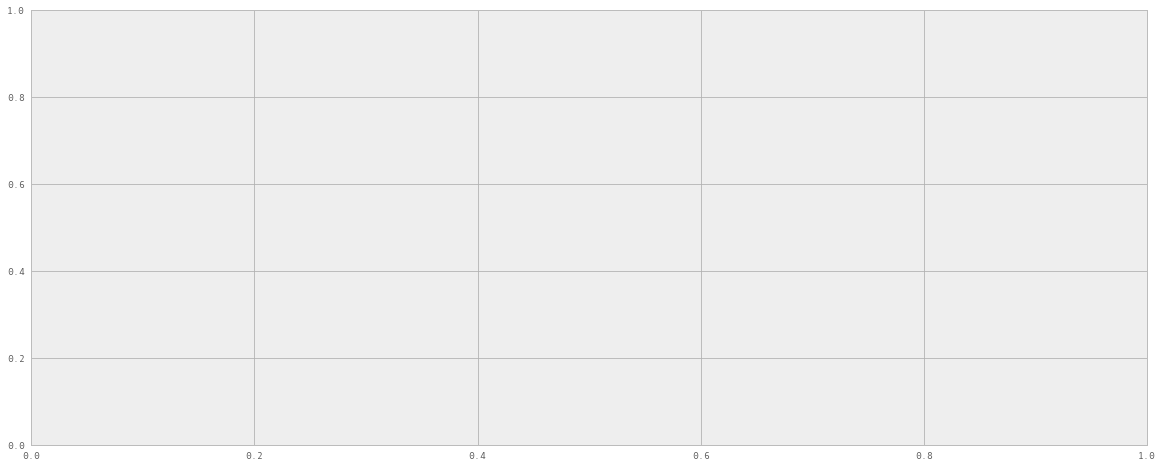

In [126]:
#BOXPLOT TENTATIVE - WIP

hi = "Importance_of_High_Register"
mid = "Importance_of_Middle_Register"
lo = "Importance_of_Bass_Register"


fig, ax = plt.subplots(figsize=(20,8))
pd.options.display.mpl_style = 'default'
plt.suptitle('')
df_pred.boxplot(column='genre', by=[hi, mid, lo], ax=ax)
plt.show()

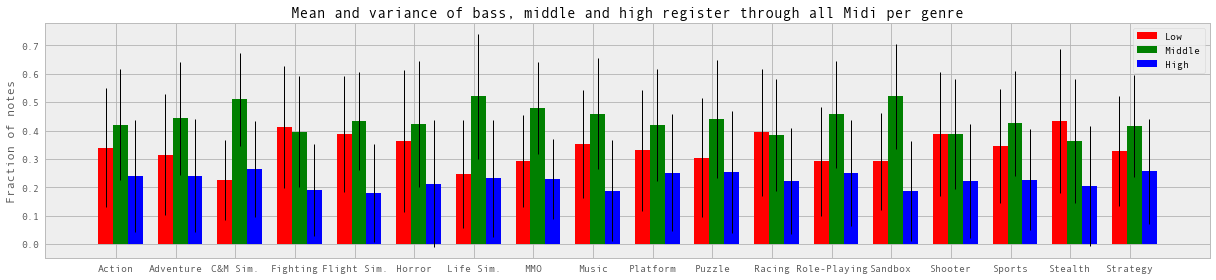

In [184]:
#Dynamic range distribution according to genre :
hi = "Importance_of_High_Register"
mid = "Importance_of_Middle_Register"
lo = "Importance_of_Bass_Register"

dyn_df = groupby_stats[[hi, mid, lo]]    
ind = np.arange(len(dyn_df))
fig, ax = plt.subplots()
width = 0.25
rects_lo = ax.bar(ind, dyn_df[lo]['mean'], width, color='r', yerr=dyn_df[lo]['std'])
rects_mi = ax.bar(ind+width, dyn_df[mid]['mean'], width, color='g', yerr=dyn_df[mid]['std'])
rects_hi = ax.bar(ind+2*width, dyn_df[hi]['mean'], width, color='b', yerr=dyn_df[hi]['std'])
    
ax.legend((rects_lo[0], rects_mi[0], rects_hi[0]), ('Low', 'Middle', 'High'))
ax.set_xticks(ind + (width+0.1) / 2)
ax.set_xticklabels(games_genre)

ax.set_title('Mean and variance of bass, middle and high register through all Midi per genre')
ax.set_ylabel('Fraction of notes')
fig.set_size_inches((17,4))
plt.tight_layout()
plt.show()


The feature of Bass/Middle/High register is simply the fraction of all notes of a certain Midi Pitch range over the total number of notes. jSymbolic mapped the three registers this way : 
* Bass => [0, 54] 
* Middle => [55, 72] 
* High => [73, 128]

As observable, there is a pretty huge variance for all values of frequency register, which indicates that each game genre does not seem to have a signature pitch range register. If the focus is put on the mean only, all MIDI have the rather same register distribution: most notes are in the middle, then a considerable part in the low, and a minority in the High. Only 4 genres seems to break away from this trend : Racing, Shooter, Fighting, and Stealth games. All of them have a Low register that is higher or as strong as the middle one. _Why ? I still need to think about it, probably a component of competition ? Low pitches are more akin to male/macho sounds thus driving the player to be more agressive ? thats hard to tell..._

### 4. Rhytmic Metrics

#### 4.1. Tempo

Number of midis filtered because of hellish tempo : 52


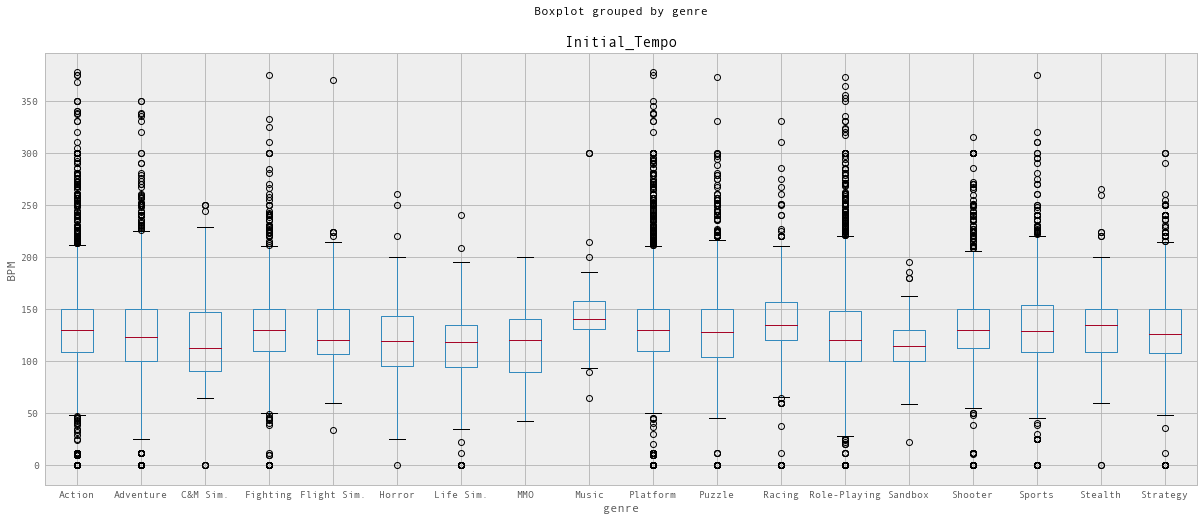

In [183]:
#Initial tests showed that a group of songs scored an initial tempo above of 400. 
midi_filtered = len(df_pred[df_pred['Initial_Tempo'] >= 400])
df_pred_tempo_filt = df_pred[df_pred['Initial_Tempo'] < 400]
fig, ax = plt.subplots(figsize=(20,8))
plt.suptitle('')
df_pred_tempo_filt.boxplot(column='Initial_Tempo', by='genre', ax=ax)
ax.set_ylabel('BPM')
print("Number of midis filtered because of hellish tempo : "+ str(midi_filtered))
plt.show()

52 Midis were left out of the analysis, as they had tempo of over 400, which seems like a unrealistic bpm probably set by unexperienced or foolisher users from tgmdb archive.
Before interpreting the results, it should be noted that tempo does not necessarily correlate with a song speed, or perceived fastness. A song apparently in 180 BPM could only have whole notes through the whole piece, thus giving a very slow-paced feeling although a high tempo. Also, a user might sequence a video game music of 120 BPM into a MIDI of 60 BPM 

Initial Tempo shows more difference between genres than MIDI duration already. The most remarkable genre is again the "Music" one, with a narrow high-placed IQR. This is quite obvious when considering most of the Music games are dance simulator, and more rhytmed songs are more enjoyable to dance for the casual player.

Racing Games also seems to have higher tempo than most of the other genres, which would maybe encourage player to display a more nervous game play style to drive them to the finish line faster.

Sanbox games on the opposite, have more slow-paced midis, which would go along with the game design choice of exploration, limitless discovering and building that goes along with sandbox games.


#### 4.2 Temporal Metrics

In [205]:
def countMeters(x):
    #TODO : Make that thing work. ((Ask Raph/Hakim for help...))
    sub_df = x[['Compound_Or_Simple_Meter','Triple_Meter', 'Quintuple_Meter']]
    compound = "Compound_Or_Simple_Meter"
    triple = "Triple_Meter"
    quint = "Quintuple_Meter"
    
    compound_bin = 0
    triple_bin = 0
    quint_bin = 0
    simple_bin = 0
    
    for row in sub_df:
        if row[quint] == 1:
            quint_bin += 1
        elif row[triple] == 1:
            triple_bin += 1
        elif row[compound] == 1:
            compound_bin += 1
        else:
            simple_bin += 1
    return compound_bin, triple_bin, quint_bin, simple_bin


groupby_genre.apply(countMeters)
#df_pred[['Compound_Or_Simple_Meter','Triple_Meter', 'Quintuple_Meter']]

TypeError: string indices must be integers